In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


2023-02-04 08:31:39.065184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 08:31:40.287281: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.0/lib64::/usr/local/tensorrt/lib/
2023-02-04 08:31:40.287385: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.0/lib64::/usr/local/tensorrt/lib/
2023-02-04 08:31:40.2873

In [2]:
data_dir = "/home/kalyan/DataSets/HumanVsHorse/horse-or-human/"
train_dir = data_dir + "/train/"
test_dir = data_dir + "/validation/"

In [3]:
horse_train_dir = data_dir + "/train/horses/"
human_train_dir = data_dir + "/train/humans/"
horse_val_dir = data_dir + "/validation/horses/"
human_val_dir = data_dir + "/validation/humans/"

In [4]:
train_horse_names = os.listdir(horse_train_dir)
train_human_names = os.listdir(human_train_dir)
val_horse_names = os.listdir(horse_val_dir)
val_human_names = os.listdir(human_val_dir)
print("Total training horse images:", len(os.listdir(horse_train_dir)))
print("Total training human images:", len(os.listdir(human_train_dir)))
print("Total validation horse images:", len(os.listdir(horse_val_dir)))
print("Total validation human images:", len(os.listdir(human_val_dir)))

Total training horse images: 500
Total training human images: 527
Total validation horse images: 128
Total validation human images: 128


In [5]:
import matplotlib.image as mpimg

n_rows = 4
n_cols = 4

pic_index = 0

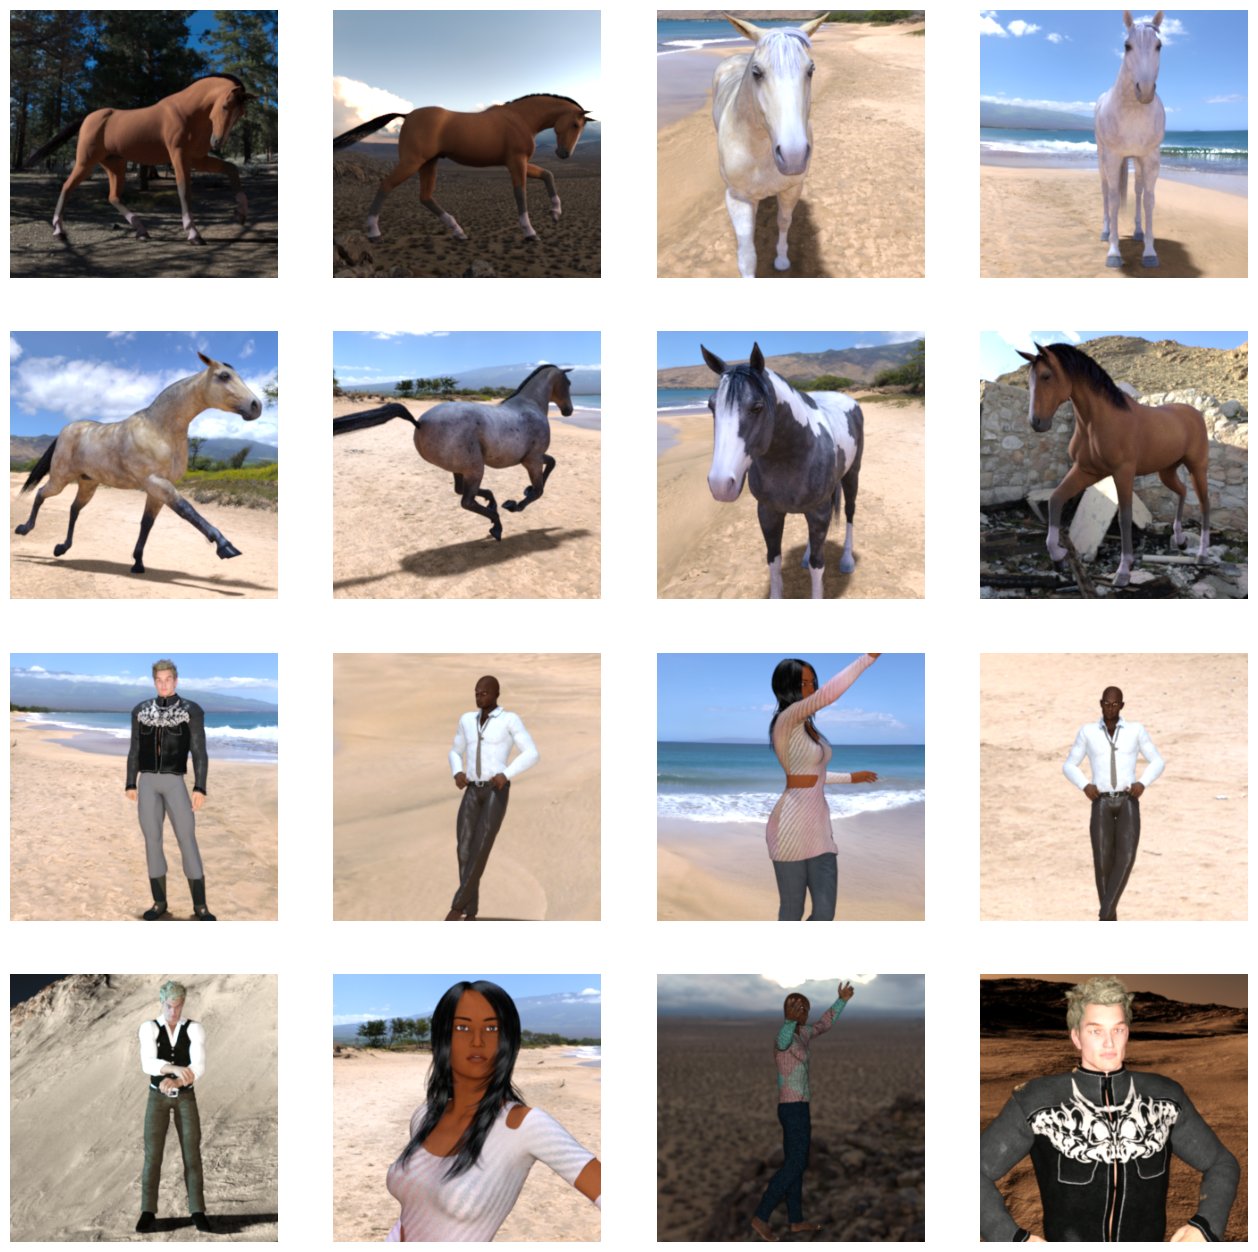

In [6]:
fig = plt.gcf()
fig.set_size_inches(n_cols * 4, n_rows * 4)

pic_index += 8
next_horse_pix = [os.path.join(horse_train_dir, fname)
                    for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(human_train_dir, fname)
                    for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(rescale=1./255)
train_generator = train_datagenerator.flow_from_directory(train_dir,
                                        target_size=(300, 300),
                                        batch_size=128,
                                        class_mode='binary')
validation_datagenerator = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagenerator.flow_from_directory(test_dir,
                                        target_size=(300, 300),     
                                        batch_size=32,
                                        class_mode='binary')
                                        

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-02-04 08:31:43.439809: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 08:31:43.497595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 08:31:43.497924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 08:31:43.498313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                metrics=['acc'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/15


2023-02-04 08:31:47.206768: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-02-04 08:31:48.627865: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f064400c3b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-04 08:31:48.627890: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-02-04 08:31:48.634039: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-04 08:31:48.728626: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-02-04 08:31:50.363933: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.69GiB with freed_by_count=0. The

8/8 [==============================] - 10s 586ms/step - loss: 1.0767 - acc: 0.4701 - val_loss: 0.6903 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 4s 548ms/step - loss: 0.6877 - acc: 0.5137 - val_loss: 0.6792 - val_acc: 0.5273
Epoch 3/15
8/8 [==============================] - 4s 551ms/step - loss: 0.6783 - acc: 0.5527 - val_loss: 0.6336 - val_acc: 0.5156
Epoch 4/15
8/8 [==============================] - 4s 515ms/step - loss: 0.5950 - acc: 0.6851 - val_loss: 0.4526 - val_acc: 0.8477
Epoch 5/15
8/8 [==============================] - 4s 547ms/step - loss: 0.4224 - acc: 0.8516 - val_loss: 0.4024 - val_acc: 0.8750
Epoch 6/15
8/8 [==============================] - 4s 549ms/step - loss: 0.3137 - acc: 0.8730 - val_loss: 1.5449 - val_acc: 0.6914
Epoch 7/15
8/8 [==============================] - 4s 586ms/step - loss: 0.2829 - acc: 0.9047 - val_loss: 0.7672 - val_acc: 0.8359
Epoch 8/15
8/8 [==============================] - 4s 553ms/step - loss: 0.1654 - acc: 0.9395 - val_l

1/1 [==============================] - 0s 303ms/step


/tmp/ipykernel_62908/2070408410.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


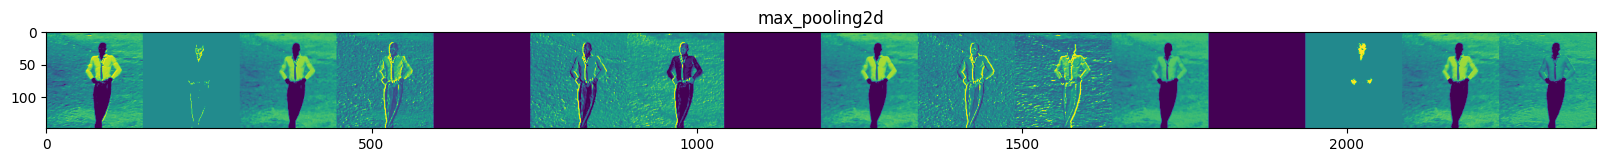

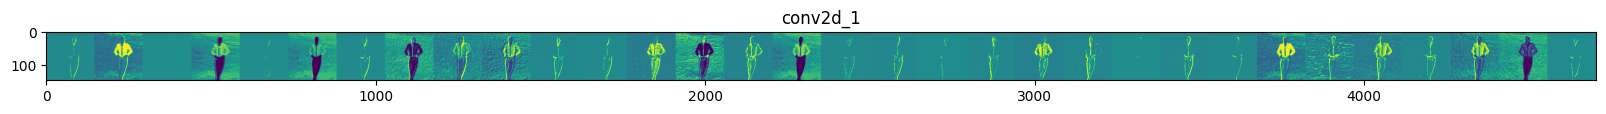

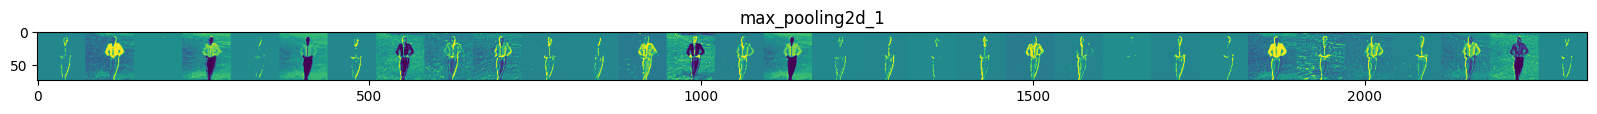

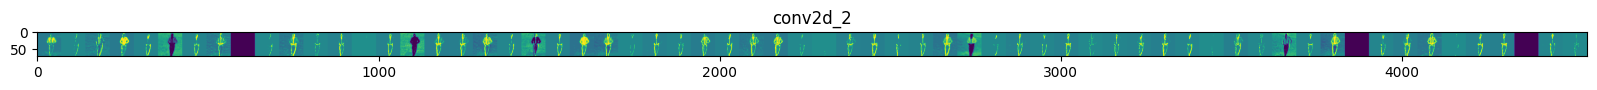

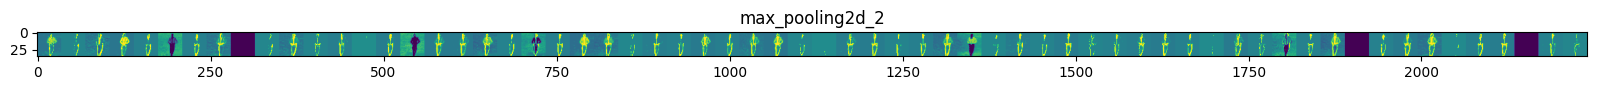

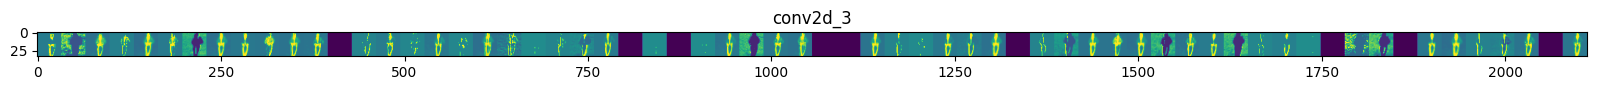

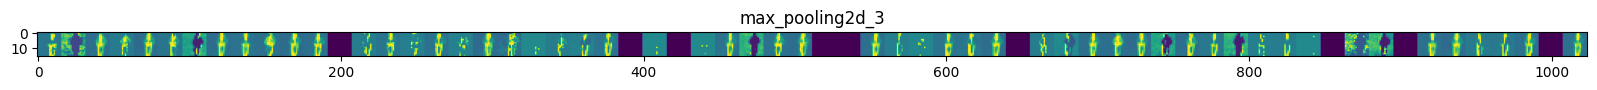

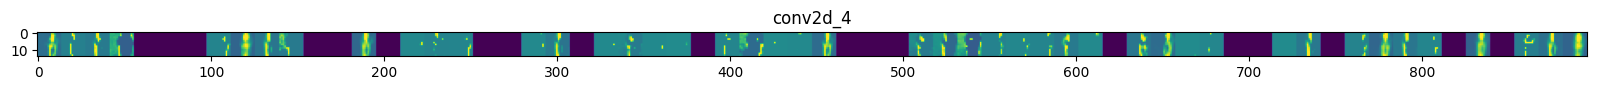

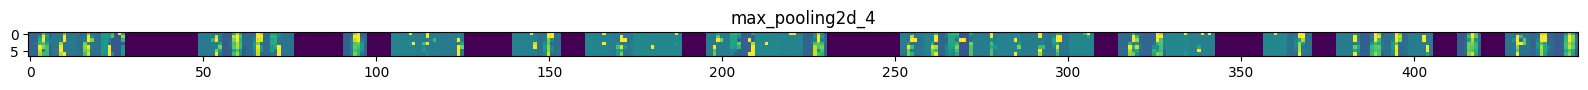

In [13]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(horse_train_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(human_train_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

: 

: 